# SINDHU D

# TASK_7

# Stock Market Prediction using Numerical and Textual Analysis

(Level - Advanced)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 11, 10)

data = web.DataReader("AAPL", 'yahoo', start, end)
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-04,115.589996,112.349998,114.139999,114.949997,138235500.0,114.752022
2020-11-05,119.620003,116.870003,117.949997,119.029999,126387100.0,118.824997
2020-11-06,119.199997,116.129997,118.320000,118.690002,114457900.0,118.690002
2020-11-09,121.989998,116.050003,120.500000,116.320000,154515300.0,116.320000
2020-11-10,117.589996,114.129997,115.550003,115.970001,138023400.0,115.970001


In [2]:
for col in data.columns:
    print(col)

High
Low
Open
Close
Volume
Adj Close


In [3]:
close = data['Adj Close']
avg = close.rolling(window=100).mean()
avg.head(20)

Date
2009-12-31   NaN
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
2010-01-19   NaN
2010-01-20   NaN
2010-01-21   NaN
2010-01-22   NaN
2010-01-25   NaN
2010-01-26   NaN
2010-01-27   NaN
2010-01-28   NaN
2010-01-29   NaN
Name: Adj Close, dtype: float64

In [4]:
data.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [5]:
data.shape

(2735, 6)

In [6]:
train = data[['High','Low','Open','Volume','Adj Close']].values
validation = data['Close'].values

In [7]:
train.shape

(2735, 5)

In [8]:
validation.shape

(2735,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(train,validation,train_size=0.7,random_state=1)

In [11]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1914, 5) (1914,)
(821, 5) (821,)


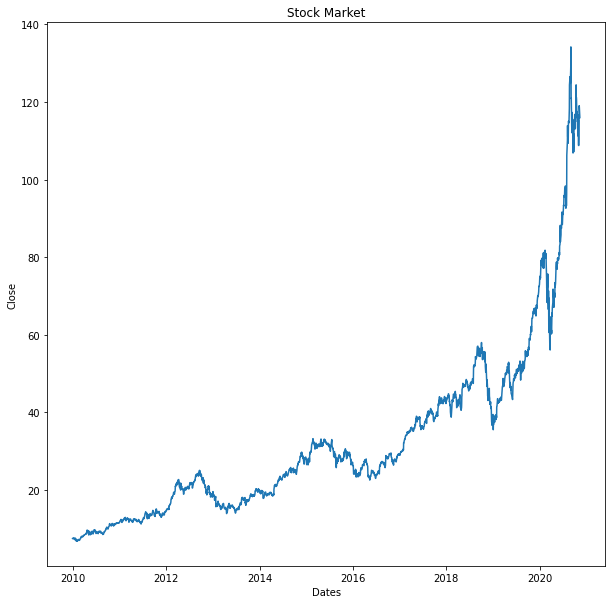

In [12]:
plt.figure(figsize=(10,10))
plt.title("Stock Market")
plt.xlabel("Dates")
plt.ylabel("Close")
plt.plot(data['Close'])
plt.show()

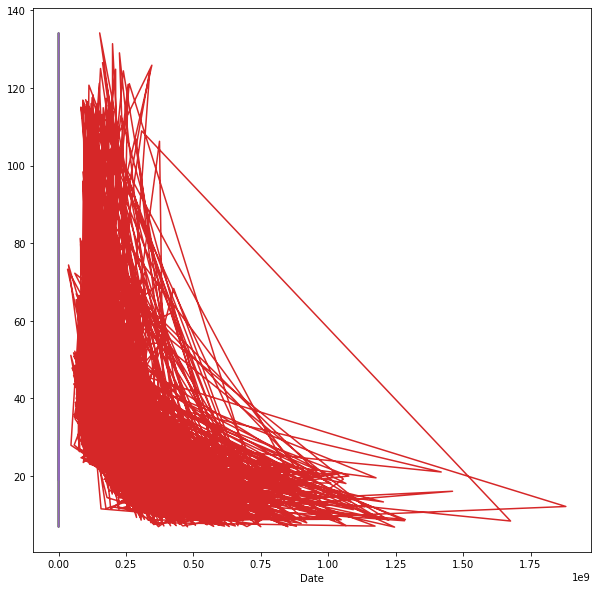

In [13]:
plt.figure(figsize=(10,10))
plt.plot(x_train,y_train)
plt.xlabel('Date')
plt.show()

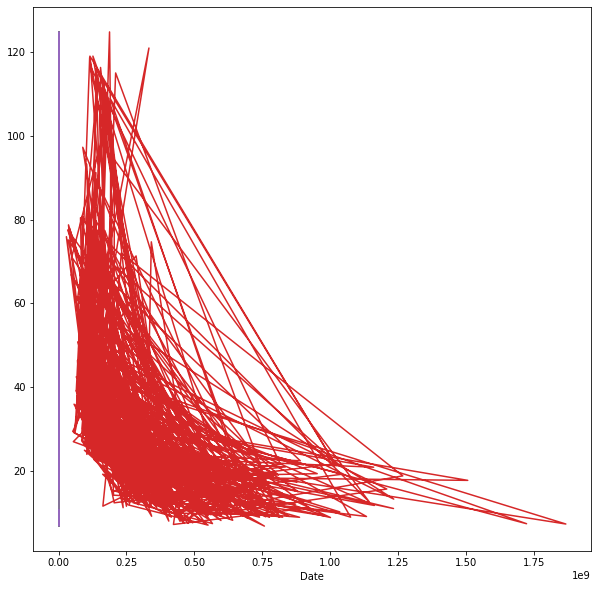

In [14]:
plt.figure(figsize=(10,10))
plt.plot(x_test,y_test)
plt.xlabel('Date')
plt.show()

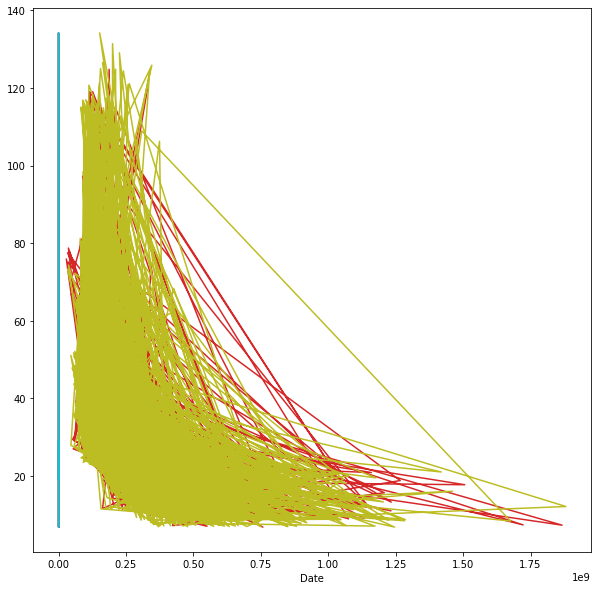

In [15]:
plt.figure(figsize=(10,10))
plt.plot(x_test,y_test)
plt.plot(x_train,y_train)
plt.xlabel('Date')
plt.show()

Green color represent Train data
red represents the validation data

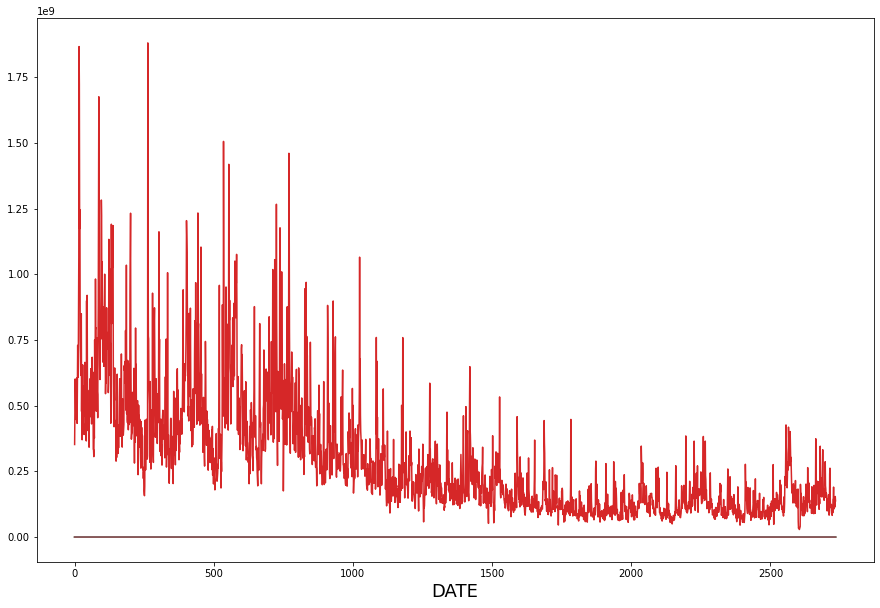

In [16]:
plt.figure(figsize=(15,10))

plt.plot(train)
plt.plot(validation)
plt.xlabel('DATE', fontsize= 18)
plt.show()

In [17]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,6.439648,10.615742,308.832428,91.085335,23.801456
2010-01-04,6.539882,10.840267,312.204773,92.163887,24.168472
2010-01-05,6.551187,10.896401,310.829926,91.050545,24.176279
2010-01-06,6.446983,10.840267,302.994293,90.459076,24.027906
2010-01-07,6.435065,11.401575,295.940735,90.145927,23.778025


In [18]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.021150,0.010920,0.011841,0.015420
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005152,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008822,0.009639,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006607
2010-01-13,0.014106,0.003578,-0.005741,-0.002145,0.009312


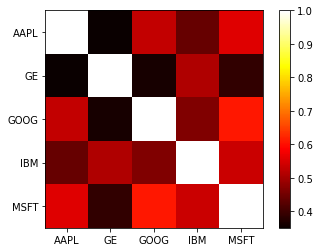

In [19]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

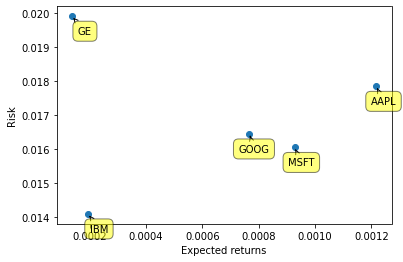

In [20]:

plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

In [21]:
data1 =pd.read_csv("C:\\Users\\This\\Downloads\\india-news-headlines.csv")

In [22]:
data1.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2735 entries, 2009-12-31 to 2020-11-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2735 non-null   float64
 1   Low        2735 non-null   float64
 2   Open       2735 non-null   float64
 3   Close      2735 non-null   float64
 4   Volume     2735 non-null   float64
 5   Adj Close  2735 non-null   float64
dtypes: float64(6)
memory usage: 149.6 KB


In [24]:
data.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [25]:
data1['publish_date'] = pd.to_datetime(pd.Series(data1['publish_date']), format = '%Y%m%d')
data1['publish_date'].apply(lambda x:x.strftime('%y-%m-%d'))

0          01-01-01
1          01-01-02
2          01-01-02
3          01-01-02
4          01-01-02
             ...   
3297167    20-06-30
3297168    20-06-30
3297169    20-06-30
3297170    20-06-30
3297171    20-06-30
Name: publish_date, Length: 3297172, dtype: object

In [26]:
data1.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [27]:
data1.tail()

,publish_date,headline_category,headline_text
3297167,2020-06-30,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,2020-06-30,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [28]:
for col1 in data1.columns:
    print(col1)

publish_date
headline_category
headline_text


# Data Exploration-

In [29]:
print("Maximum from dataset:\n", data1.max())

Maximum from dataset:
 publish_date                                       2020-06-30 00:00:00
headline_category                                          young-turks
headline_text        ~!The 7 Plexus Knots story in a Galaxy called ...
dtype: object


In [30]:
print("minimum from dataset:\n", data1.min())

minimum from dataset:
 publish_date                     2001-01-01 00:00:00
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object


In [31]:
data1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [32]:
data1['headline_text'].value_counts()

Sunny Leone HOT photos                                         98
Watch top news in one-minute                                   90
Official Site                                                  89
Football: Italian Serie A table                                88
Football: Spanish La Liga table                                86
                                                               ..
Madurai: 60 approach pharmacies for fever pills daily           1
Araria video sent to Delhi for verification of authenticity     1
Police want strict privacy policy on Facebook                   1
Missing for 2 months; teen returns home pregnant                1
Double elimination on Jhalak Dikhhla Jaa 9                      1
Name: headline_text, Length: 3082589, dtype: int64

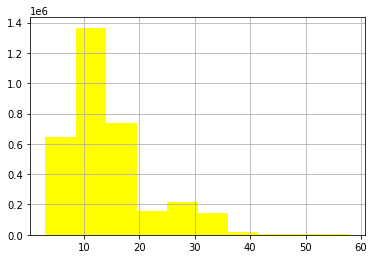

In [33]:
data1['headline_category'].str.len().hist(color="yellow")
plt.show()

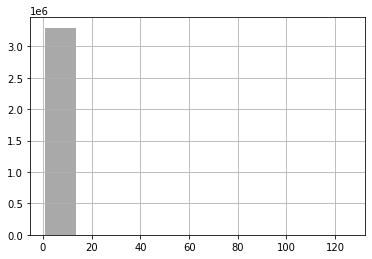

In [34]:

data1['headline_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)).hist(color='darkgrey')
plt.show()

In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\This\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
corpus = []
new = data1['headline_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [39]:
from collections import defaultdict

dict = defaultdict(int)
for word in corpus:
    if word in stop:
        dict[word]+=1

In [40]:
from collections import Counter
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

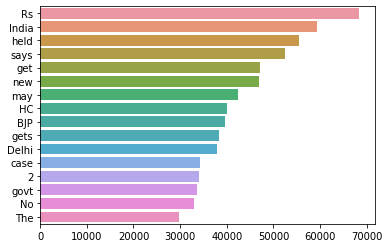

In [41]:
sns.barplot(x=y,y=x)
plt.show()

# Thank You